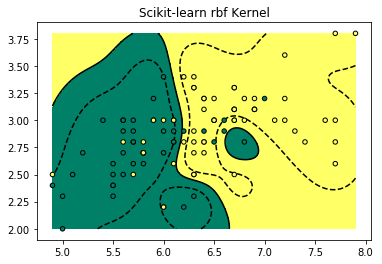

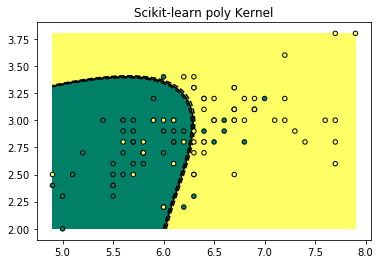

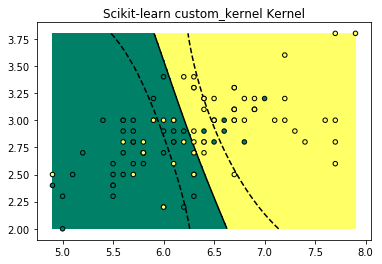

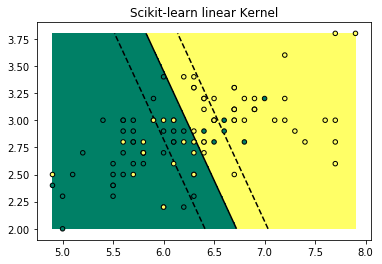

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.metrics.pairwise import linear_kernel, pairwise_kernels
import scipy


def plot_data(X, y, title):
    plt.figure()
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        zorder=10,
        cmap=plt.cm.summer,
        edgecolor='k',
        s=20)

    plt.axis('tight')
    plt.title(title)


def plot_decision(XX, YY, Z):
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.summer)
    plt.contour(
        XX,
        YY,
        Z,
        colors=['k', 'k', 'k'],
        linestyles=['--', '-', '--'],
        levels=[-.5, 0, .5])


iris = datasets.load_iris()
X = iris.data
y = iris.target

# Three classes, let's discard one
X = X[y != 0, :2]
y = y[y != 0]

# Build a grid of data points to test
(x_min, y_min) = X.min(axis=0)
(x_max, y_max) = X.max(axis=0)

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
X_test = np.c_[XX.ravel(), YY.ravel()]

# we think this is a laplacian kernel as an example of a custom kernel function
# laplacian: K = exp(-gamma*abs(X - y))
# the laplacian is type of rbf, but it is less sensitive to changes in the gamma kernel than the exponential
def laplacian(X, y):
    from sklearn.metrics.pairwise import euclidean_distances
    gamma = 1.0 / X.shape[1]
    K = -gamma * euclidean_distances(X, y, squared=True)
    return np.exp(K, K)

# fit the model
kernels = ["rbf", "poly", custom_kernel, "linear"]

# The scikit decision function
for k in kernels:
    clf = svm.SVC(kernel=k, gamma=10)
    clf.fit(X, y)
    Z_scikit = clf.decision_function(X_test)
    if k == custom_kernel:
        k = k.__name__
    plot_data(X, y, "Scikit-learn {} Kernel".format(k))
    plot_decision(XX, YY, Z_scikit)


kernel = linear_kernel

# Pull out the data that we need:
dual_coefficients = clf.dual_coef_
coefficients = clf.coef_
support_vectors = clf.support_vectors_
intercept = clf.intercept_

40000
Coefficient decision function correct


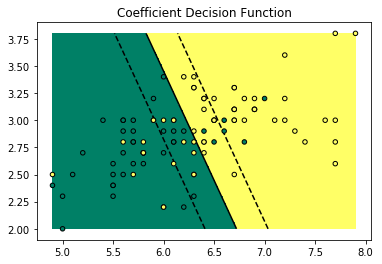

In [40]:
def decision_function_coefficients(w, X, intercept):
    # Add code here to emulate the decision function
    # weights * datapoint + intercept
    decision_value = np.dot(X, w.T) + intercept
    print(np.size(np.dot(X,w.T) + intercept))
    return np.dot(X,w.T) + intercept
    # print(decision_value)
    # return np.zeros((200, 200))

Z_coef = decision_function_coefficients(coefficients, X_test, intercept)
plot_data(X, y, "Coefficient Decision Function")
plot_decision(XX, YY, Z_coef)

if np.allclose(Z_coef.flatten(), Z_scikit.flatten()):
    print("Coefficient decision function correct")
else:
    print("Broken coefficient decision function?")


69
Dual decision function correct


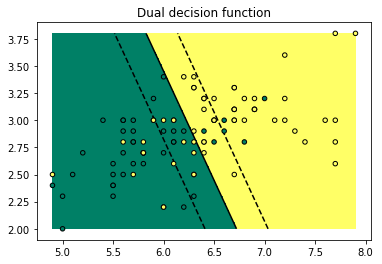

In [41]:
def decision_function_dual(kernel, X, support_vectors, dual_coefficients,
                           intercept):

    # Add code here to emulate the decision function
    print(np.size(dual_coefficients))
    return np.dot(dual_coefficients,kernel(support_vectors,X)) + intercept
    #return np.zeros((200, 200))


Z_dual = decision_function_dual(kernel, X_test, support_vectors,
                                dual_coefficients, intercept)
plot_data(X, y, "Dual decision function")
plot_decision(XX, YY, Z_dual)

if np.allclose(Z_dual.flatten(), Z_scikit.flatten()):
    print("Dual decision function correct")
else:
    print("Broken dual decision function?")